In [55]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_absolute_error
color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [30]:
df = pd.read_csv('/Users/phionanamugga/Documents/coding/datascience/Energy_Projects/PJME_hourly.csv')

##3. Setting the datetime as index

In [31]:
df.set_index('Datetime', inplace=True)
# making index as datetime(object64 )
df.index = pd.to_datetime(df.index)

##4.Visualizing data set

In [32]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [33]:
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


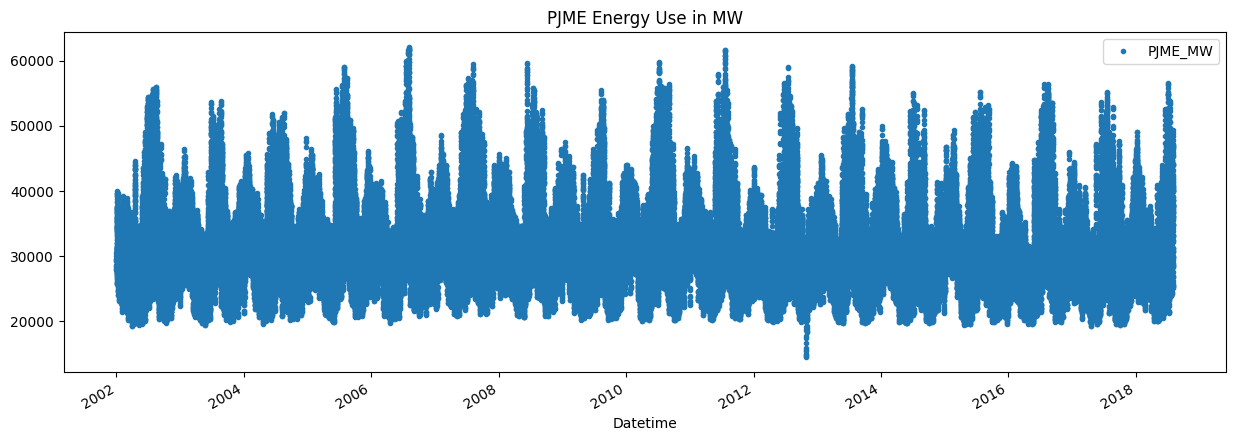

In [34]:
df.plot(style ='.', 
        figsize=(15, 5), 
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

In [35]:
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

## Training model
## note that cross validation has not been done yet but you need to do it




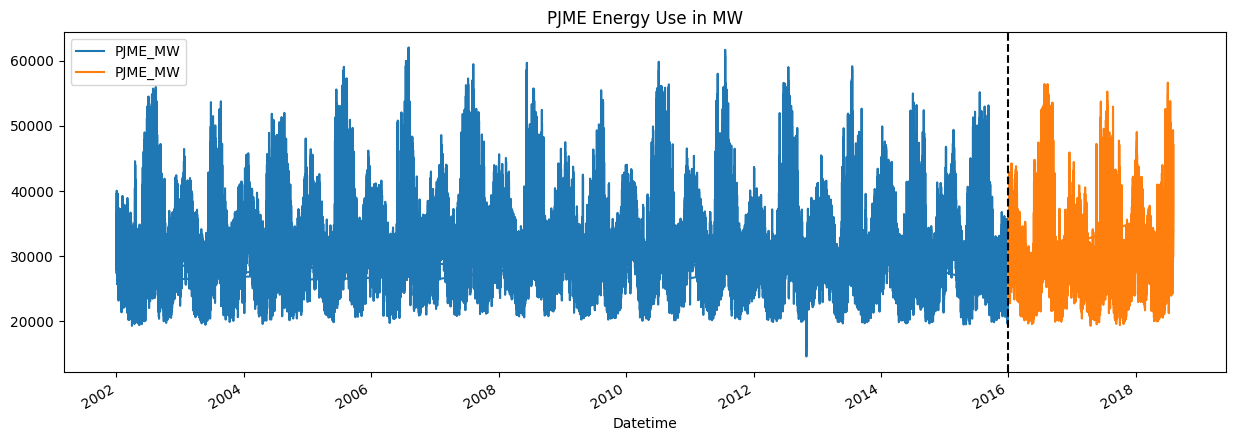

In [36]:
#Train/Test Split
train = df.loc[df.index < '2015-12-31'] # locates data before 2015-12-31
test = df.loc[df.index >= '2016-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='PJME Energy Use in MW')
test.plot(ax=ax, label='Test Set')

ax.axvline('2016-01-01', color='black', ls='--') # adding vertical line to indicate split
plt.show() 

<Axes: xlabel='Datetime'>

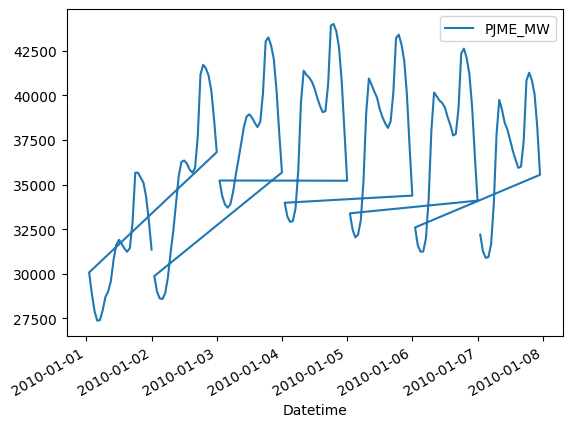

In [ ]:
# visualizing a week in January 2010
df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-8')].plot()

## Carrying out feature engineering

In [47]:
def create_features(df):
    """
    Creates time series features from datetime index
    """

    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)

## Visualizing our Feature/Target relationship

/var/folders/_f/952nnrtj2cqfx6j55v126fl80000gn/T/ipykernel_47994/4048309937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='hour', y='PJME_MW', data=df, palette='Purples')


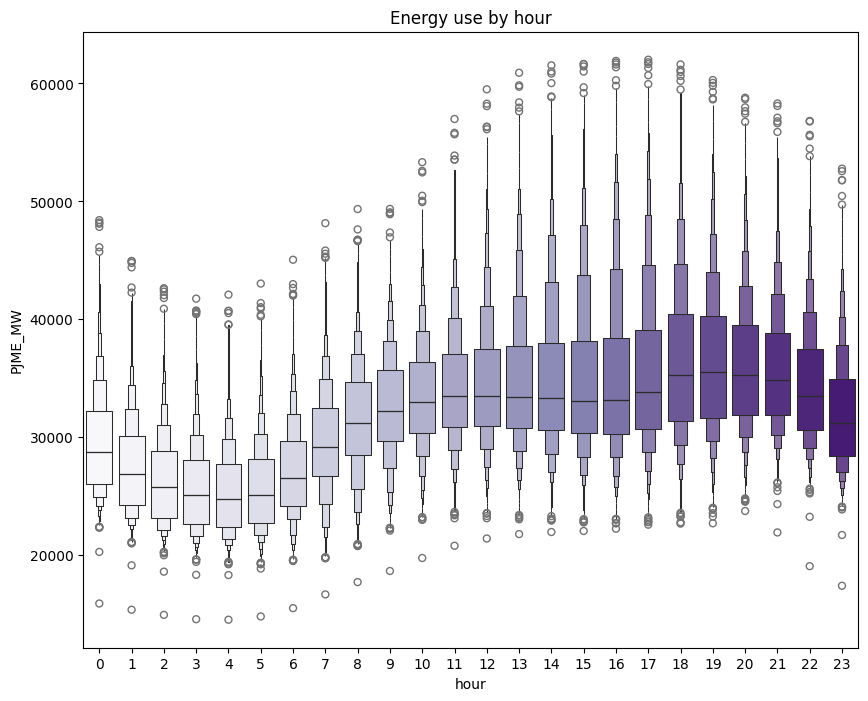

In [53]:
# Visualizing our Feature/Target relationship
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxenplot(x='hour', y='PJME_MW', data=df, palette='Purples')
ax.set_title('Energy use by hour')
plt.show()

/var/folders/_f/952nnrtj2cqfx6j55v126fl80000gn/T/ipykernel_47994/2675811272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='month', y='PJME_MW', data=df, palette='Purples')


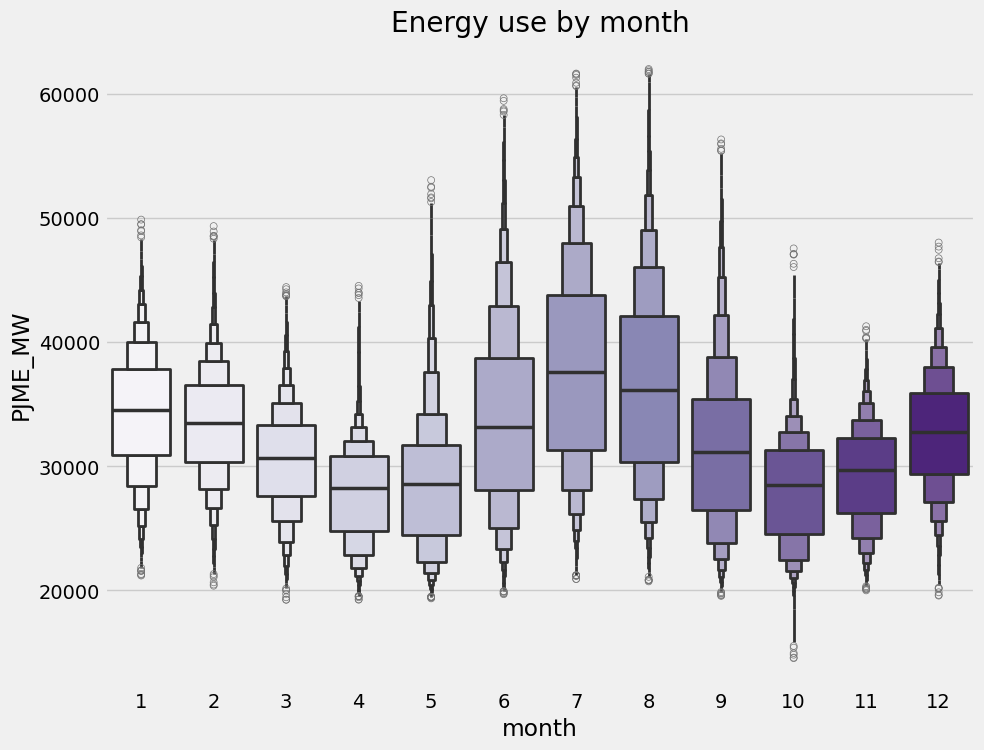

In [75]:
# Visualizing our Feature/Target relationship BY MONTH
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxenplot(x='month', y='PJME_MW', data=df, palette='Purples')
ax.set_title('Energy use by month')
plt.show()

## Creating model

In [58]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [69]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour','dayofweek','quarter','month','year','dayofyear']
TARGET = 'PJME_MW'

# Ensure all feature columns are integer type
for col in FEATURES:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]
reg = xgb.XGBRegressor(n_estimators=1000,
                       early_stopping_rounds=50,
                       learning_rate=0.001,
                       n_jobs=8,
                       random_state=1
                       )
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:6460.17186	validation_1-rmse:6471.35931


/var/folders/_f/952nnrtj2cqfx6j55v126fl80000gn/T/ipykernel_47994/2217832470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/var/folders/_f/952nnrtj2cqfx6j55v126fl80000gn/T/ipykernel_47994/2217832470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
/var/folders/_f/952nnrtj2cqfx6j55v126fl80000gn/T/ipykernel_47994/2217832470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

[100]	validation_0-rmse:6038.24270	validation_1-rmse:6102.18376
[200]	validation_0-rmse:5666.45629	validation_1-rmse:5784.50620
[300]	validation_0-rmse:5337.95753	validation_1-rmse:5506.42702
[400]	validation_0-rmse:5051.00684	validation_1-rmse:5267.26444
[500]	validation_0-rmse:4799.74298	validation_1-rmse:5063.08661
[600]	validation_0-rmse:4579.07844	validation_1-rmse:4886.07200
[700]	validation_0-rmse:4386.77927	validation_1-rmse:4735.18135
[800]	validation_0-rmse:4218.57452	validation_1-rmse:4607.12662
[900]	validation_0-rmse:4072.44737	validation_1-rmse:4498.99184
[999]	validation_0-rmse:3946.07453	validation_1-rmse:4408.57628


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


## Evaluation

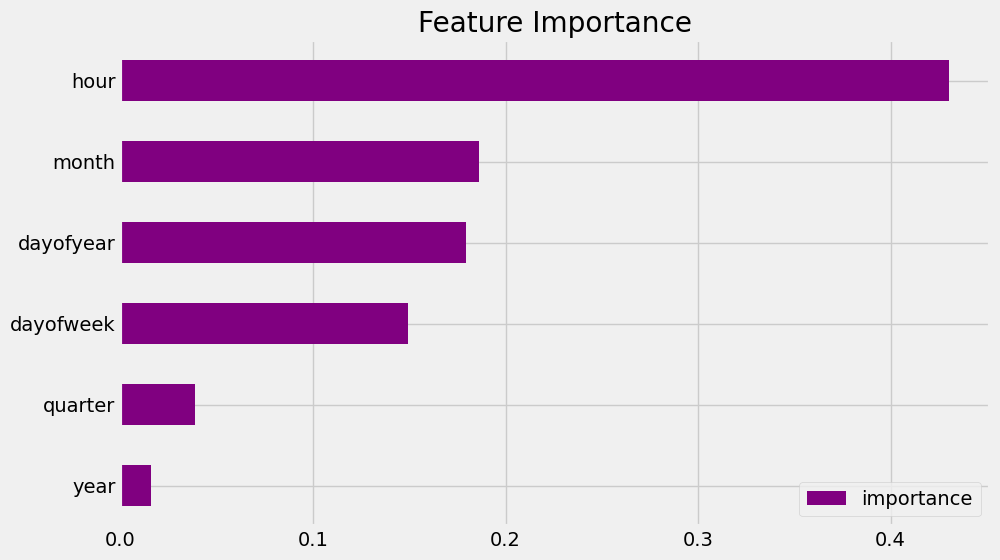

In [74]:
# Checking feature importance
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['importance'])

fi.sort_values('importance').plot(kind='barh', figsize=(10, 6), color='purple')
plt.title('Feature Importance')
plt.show()

## Forecast on Test

In [78]:
df.merge(test[['prediction']],how = 'left', left_index = True, right_index=True)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,NaN
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,NaN
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,NaN
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,NaN
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,NaN
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,35535.050781
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,35535.050781
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,35535.050781


In [ ]:
df.merge